## Simple Linear Regresion

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# import pylab as pd
"""
`pylab` is a module that includes `matplotlib.pyplot`, `numpy`, `numpy.fft`,
`numpy.linalg`, `numpy.random`, and some additional functions, all within
a single namespace. Its original purpose was to mimic a MATLAB-like way
of working by importing all functions into the global namespace. This is
considered bad style nowadays.
"""
import numpy as np
%matplotlib inline

## Downloading Data
From IBM Object Storage.

In [6]:
# check either terminar is CMD or PowerShell
!(dir 2>&1 *`|echo CMD);&<# rem #>echo PowerShell
!mkdir datasets 2>NUL
!wget -O datasets/FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

CMD


--2023-10-13 13:46:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'datasets/FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70%  254K 0s
    50K .......... ..........                                 100% 79,2K=0,5s

2023-10-13 13:46:35 (154 KB/s) - 'datasets/FuelConsumption.csv' saved [72629/72629]



In [7]:
# df = pd.read_csv(r"D:\_Jaime\02 UPTP\_CLASES\05 QUINTO SEMESTRE\07 CAPSOTNE\07 Code\MJCapstone\08 Courses\Machine Learning\datasets\FuelConsumption.csv")
df = pd.read_csv(r"datasets\FuelConsumption.csv")

### Data Exploration

In [8]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_CITY'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_HWY'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>]],
      dtype=object)

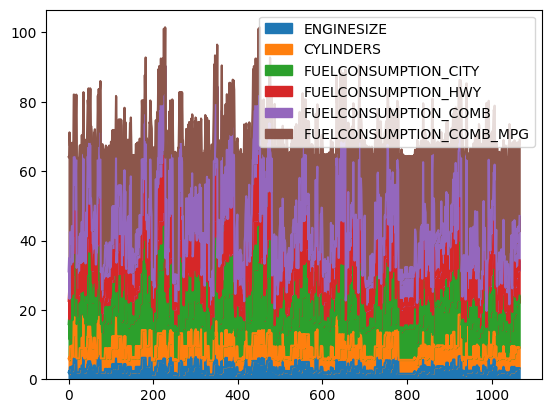

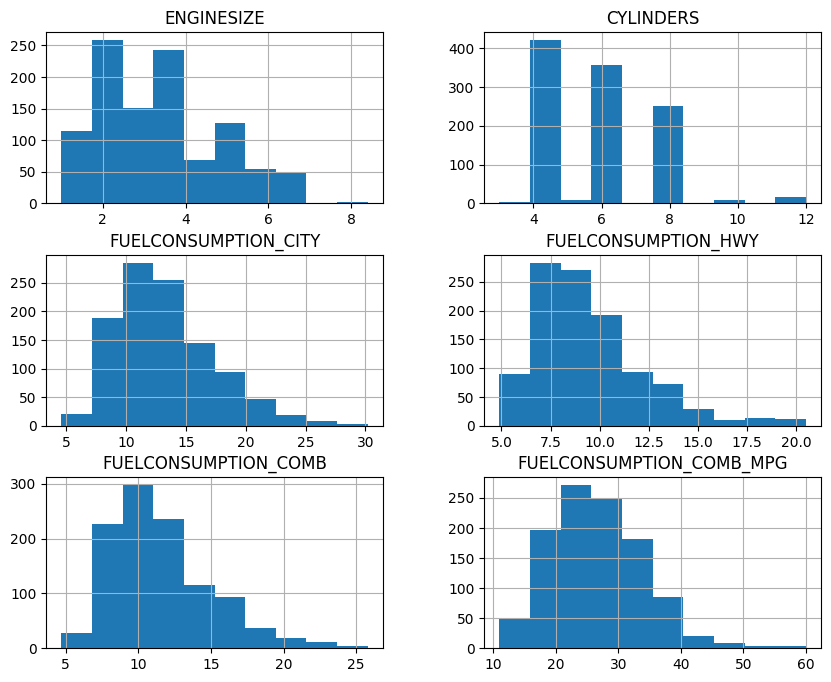

In [11]:
# df.drop('MODELYEAR', axis=1).plot() # only drop before plotting, does not affect the original DataFrame
df.drop('MODELYEAR', axis=1).drop("CO2EMISSIONS", axis=1).plot(kind='area')
df.drop('MODELYEAR', axis=1).drop("CO2EMISSIONS", axis=1).hist(figsize=(10,8))

In [12]:
print("Fuel type: ", df[df.columns[7]].unique())
print("Cylinders: ", df[df.columns[5]].unique())

Fuel type:  ['Z' 'D' 'X' 'E']
Cylinders:  [ 4  6 12  8 10  3  5]


## Trying simple regresion
Taking Engin size, fuelconsumption, cilinders and co2_emissions.

In [13]:
df_simple_regression = pd.DataFrame.copy(df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']])
df_simple_regression.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


In [14]:
df_simple_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [15]:
df_simple_regression.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


d:\CondaEnvs\TextMining\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

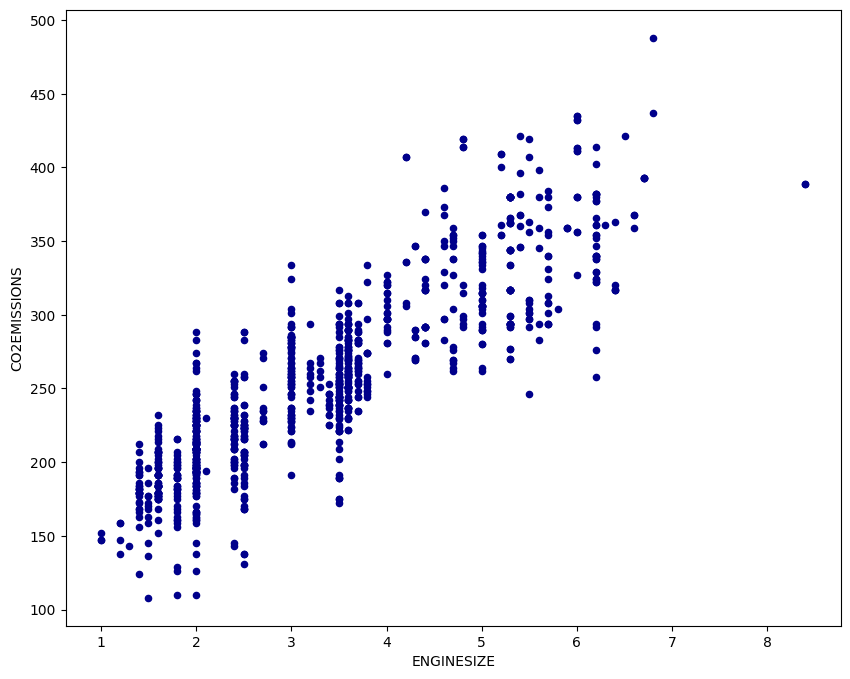

In [16]:
df_simple_regression.plot(kind='scatter', x='ENGINESIZE', y='CO2EMISSIONS', color='darkblue', figsize=(10, 8))

array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_CITY'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

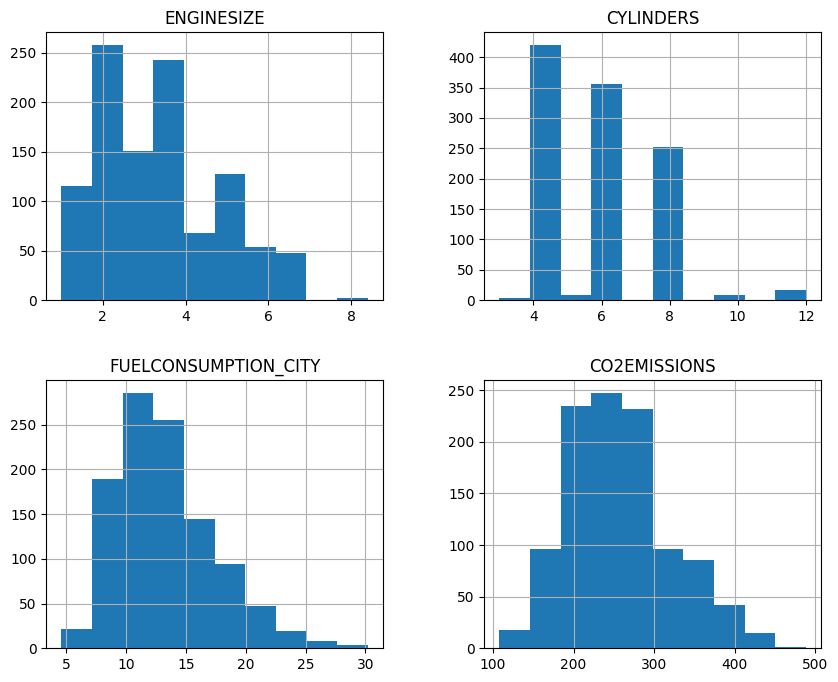

In [17]:
df_simple_regression.hist(figsize=(10,8))

In [18]:
# checking engine size distribution
df_simple_regression[df_simple_regression.columns[0]].sort_values(0).unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19608\3947215221.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  df_simple_regression[df_simple_regression.columns[0]].sort_values(0).unique()


array([1. , 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2. , 2.1, 2.4, 2.5, 2.7, 3. ,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 4. , 4.2, 4.3, 4.4, 4.6, 4.7,
       4.8, 5. , 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.2, 6.3,
       6.4, 6.5, 6.6, 6.7, 6.8, 8.4])

At this first model, I did not split into train and test to check and understand how 1 and 2 dimension array works.

In [19]:
X = pd.DataFrame(df_simple_regression['ENGINESIZE'])
y = pd.DataFrame(df_simple_regression['CO2EMISSIONS'])

X_serie = np.array(df_simple_regression['ENGINESIZE'])
y_serie = np.array(df_simple_regression['CO2EMISSIONS'])


In [20]:
print(type(df_simple_regression))
print(type(X))
print(type(y))
print(type(X_serie))
print(type(y_serie))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
X

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [22]:
X_serie

array([2. , 2.4, 1.5, ..., 3. , 3.2, 3.2])

In [23]:
# If panda data frame is used
# X.values.reshape(-1, 1)
print(X.values.ndim, X.values.shape)
print("After reshape:")
# X.values.reshape(1, -1) 
X.values.reshape(-1, 1)  # with panda data frame it does not change
print(X.values.ndim, X.values.shape)

print("-----------------")

# If panda series series is used # Not working
# print(X_serie.values.ndim, X_serie.values.shape)
# X_serie.values.ndim, X.values.shape
# X_serie.values.reshape(-1, 1)
# print("After reshape: ")
# X_serie.values.ndim, X_serie.values.shape

# If numpy array is used
print(X.ndim, X.shape)
X_serie.reshape(-1,1) # era necesario?
print(X.ndim, X.shape)


2 (1067, 1)
After reshape:
2 (1067, 1)
-----------------
2 (1067, 1)
2 (1067, 1)


In [24]:
# If panda data frame is used
# X.values.reshape(-1, 1)
print(y.values.ndim, y.values.shape)
print("After reshape:")
# X.values.reshape(1, -1) 
y.values.reshape(-1, 1)  # with panda data frame it does not change
print(y.values.ndim, y.values.shape)

print("-----------------")

# If panda series series is used
# print(y_serie.values.ndim, y_serie.values.shape)
# y_serie.values.ndim, y.values.shape
# y_serie.values.reshape(-1, 1)
# print("After reshape: ")
# y_serie.values.ndim, y_serie.values.shape# y.values.reshape(-1, 1)

# If numpy array is used
print(y.ndim, y.shape)
X_serie.reshape(-1,1) # era necesario?
print(y.ndim, y.shape)


2 (1067, 1)
After reshape:
2 (1067, 1)
-----------------
2 (1067, 1)
2 (1067, 1)


In [25]:
from sklearn.linear_model import LinearRegression
simple_linearModel = LinearRegression()
simple_linearModel.fit(X, y)

# # two ways to import
# from sklearn import lenear_model
# model = linear_model.LinearRegresion()


LinearRegression()

In [26]:
z = pd.DataFrame(np.arange(0, 10, 1))
z

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [27]:
simple_linearModel.predict(z)

d:\CondaEnvs\TextMining\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[125.3040995 ],
       [164.42929928],
       [203.55449907],
       [242.67969886],
       [281.80489864],
       [320.93009843],
       [360.05529822],
       [399.180498  ],
       [438.30569779],
       [477.43089758]])

d:\CondaEnvs\TextMining\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


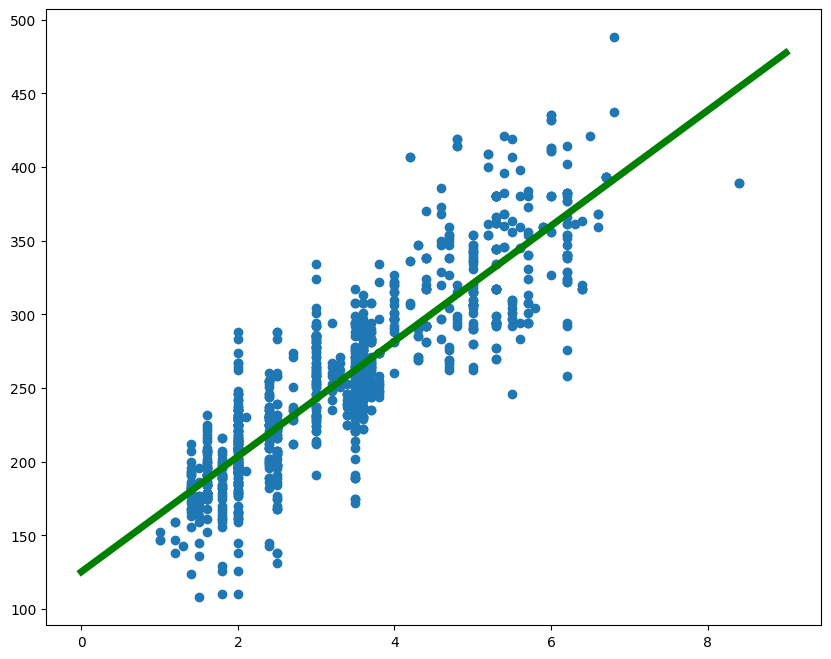

In [28]:
# x = np.arange(0, 10, 1).reshape(-1, 1)
# plt.scatter(x, linearModel.predict(x))
plt.figure(figsize=(10, 8))
plt.plot(z, simple_linearModel.predict(z), color='green', linewidth=5)
plt.scatter(X, y)
plt.show()

# Multi Linear Regression


## Another way to split data


In [29]:
mask = np.random.rand(len(df)) < 0.8
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [30]:
train = df[mask]
train


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [31]:
test = df[~mask]
test

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
10,2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225
21,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4,M6,Z,10.8,7.5,9.3,30,214
22,2014,AUDI,A5 CABRIOLET QUATTRO,SUBCOMPACT,2.0,4,AS8,Z,11.5,8.1,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,2014,VOLKSWAGEN,PASSAT,MID-SIZE,2.5,5,M5,X,11.4,7.8,9.8,29,225
1049,2014,VOLKSWAGEN,PASSAT TDI CLEAN DIESEL,MID-SIZE,2.0,4,M6,D,8.0,5.4,6.8,42,184
1055,2014,VOLKSWAGEN,TOUAREG TDI CLEAN DIESEL,SUV - STANDARD,3.0,6,AS8,D,12.3,8.0,10.4,27,281
1059,2014,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235


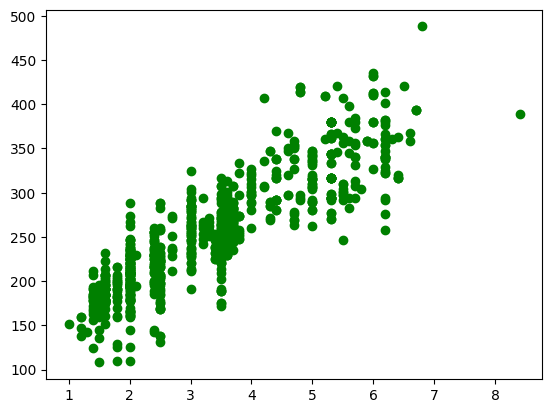

In [33]:
plt.scatter(np.array(train.ENGINESIZE), np.array(train.CO2EMISSIONS), color='green')

## Multiple Regression Model


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 844 non-null    int64  
 1   MAKE                      844 non-null    object 
 2   MODEL                     844 non-null    object 
 3   VEHICLECLASS              844 non-null    object 
 4   ENGINESIZE                844 non-null    float64
 5   CYLINDERS                 844 non-null    int64  
 6   TRANSMISSION              844 non-null    object 
 7   FUELTYPE                  844 non-null    object 
 8   FUELCONSUMPTION_CITY      844 non-null    float64
 9   FUELCONSUMPTION_HWY       844 non-null    float64
 10  FUELCONSUMPTION_COMB      844 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  844 non-null    int64  
 12  CO2EMISSIONS              844 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 92.3+ KB


In [35]:
multi_regression_model = LinearRegression()
X_train = np.array(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]])
y_train = np.array(train[["CO2EMISSIONS"]])

X_test= np.array(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]])
y_test = np.array(test[["CO2EMISSIONS"]])

In [36]:
X_train, type(X_train)

(array([[ 2. ,  4. ,  9.9],
        [ 2.4,  4. , 11.2],
        [ 1.5,  4. ,  6. ],
        ...,
        [ 3. ,  6. , 13.4],
        [ 3.2,  6. , 12.9],
        [ 3.2,  6. , 14.9]]),
 numpy.ndarray)

In [37]:
y_train, type(y_train)

(array([[196],
        [221],
        [136],
        [255],
        [244],
        [232],
        [267],
        [212],
        [239],
        [359],
        [359],
        [338],
        [354],
        [338],
        [354],
        [359],
        [202],
        [230],
        [230],
        [235],
        [251],
        [258],
        [260],
        [227],
        [288],
        [361],
        [239],
        [246],
        [304],
        [294],
        [336],
        [409],
        [407],
        [409],
        [306],
        [308],
        [290],
        [262],
        [285],
        [262],
        [285],
        [267],
        [281],
        [297],
        [292],
        [209],
        [209],
        [237],
        [237],
        [356],
        [380],
        [322],
        [380],
        [380],
        [200],
        [202],
        [181],
        [181],
        [193],
        [209],
        [221],
        [230],
        [228],
        [237],
        [232],
        [193],
        [2

In [38]:
multi_regression_model.fit(X_train, y_train)

LinearRegression()

In [39]:
print("Coefficients: ", multi_regression_model.coef_)

Coefficients:  [[11.71430907  5.99911577  8.31351844]]


In [40]:
print(multi_regression_model.predict(np.array([[2, 2, 2]])))

[[123.35373984]]


In [111]:
# plt.figure()
# # plt.scatter(X_train[0], y_train)
# plt.barh(X_train, y_train)

# plt.show()

### Terting on Scatter

In [78]:
[i[0] for i in X_train]

[2.0,
 2.4,
 1.5,
 3.5,
 3.5,
 3.5,
 3.7,
 2.4,
 3.5,
 5.9,
 5.9,
 4.7,
 4.7,
 4.7,
 4.7,
 5.9,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 4.0,
 3.0,
 4.0,
 6.3,
 2.0,
 3.0,
 3.0,
 3.0,
 4.2,
 5.2,
 4.2,
 5.2,
 4.2,
 4.2,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 4.0,
 6.0,
 6.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 4.4,
 4.4,
 3.0,
 4.4,
 4.4,
 3.0,
 4.4,
 6.0,
 3.0,
 3.0,
 3.0,
 4.4,
 4.4,
 4.4,
 4.4,
 4.4,
 4.4,
 4.4,
 4.4,
 2.0,
 3.0,
 2.0,
 3.0,
 3.0,
 4.4,
 4.4,
 3.0,
 4.4,
 2.0,
 2.0,
 3.0,
 3.6,
 1.4,
 3.6,
 3.6,
 3.6,
 3.6,
 2.0,
 2.0,
 2.0,
 2.4,
 2.0,
 2.0,
 2.0,
 2.0,
 2.5,
 3.6,
 2.0,
 3.6,
 3.6,
 3.6,
 2.0,
 3.6,
 2.0,
 3.6,
 3.0,
 3.0,
 6.2,
 6.2,
 6.2,
 6.2,
 6.2,
 6.2,
 6.2,
 6.2,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 6.2,
 6.2,
 6.2,
 6.2,
 6.2,
 1.4,
 1.8,
 2.0,
 1.4,
 1.4,
 2.4,
 3.6,
 2.4,
 3.6,
 3.6,
 4.3,
 5.3,
 5.3,
 5.3,
 5.3,
 5.3

In [49]:
X_train

array([[ 2. ,  4. ,  9.9],
       [ 2.4,  4. , 11.2],
       [ 1.5,  4. ,  6. ],
       ...,
       [ 3. ,  6. , 13.4],
       [ 3.2,  6. , 12.9],
       [ 3.2,  6. , 14.9]])

In [96]:
m = [i[0] for i in X_test]
n = [i[1] for i in X_test]
o = [i[2] for i in X_test]
m
p = [multi_regression_model.predict(X_test)]
p
# n = [multi_regression_model.predict(i) for i in X_test]
# n


[array([[247.22549902],
        [257.05052742],
        [216.52206461],
        [208.51093361],
        [214.33039651],
        [208.51093361],
        [223.90995577],
        [223.90995577],
        [251.34456661],
        [251.34456661],
        [226.4040113 ],
        [216.82445204],
        [249.68186292],
        [201.02876702],
        [344.73946835],
        [348.4995647 ],
        [314.81080198],
        [348.4995647 ],
        [284.20197749],
        [294.17819961],
        [305.81712542],
        [384.3415422 ],
        [201.86011886],
        [205.18552623],
        [206.84822992],
        [206.84822992],
        [205.18552623],
        [240.53699264],
        [239.7056408 ],
        [295.53851586],
        [295.53851586],
        [314.65960826],
        [305.51473799],
        [248.01915923],
        [256.33267767],
        [270.8434297 ],
        [190.6747742 ],
        [203.22043511],
        [217.35341645],
        [275.00018892],
        [260.03585574],
        [260.035

## Regresion per feacture comparison

In [125]:
# X_train = np.array(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]])
# y_train = np.array(train[["CO2EMISSIONS"]])
m1 = LinearRegression()
m2 = LinearRegression()
m3 = LinearRegression()
m1.fit(np.array(train[["ENGINESIZE"]]), np.array(train[["CO2EMISSIONS"]]))
m2.fit(np.array(train[["CYLINDERS"]]), np.array(train[["CO2EMISSIONS"]]))
m3.fit(np.array(train[["FUELCONSUMPTION_CITY"]]), np.array(train[["CO2EMISSIONS"]]))


LinearRegression()

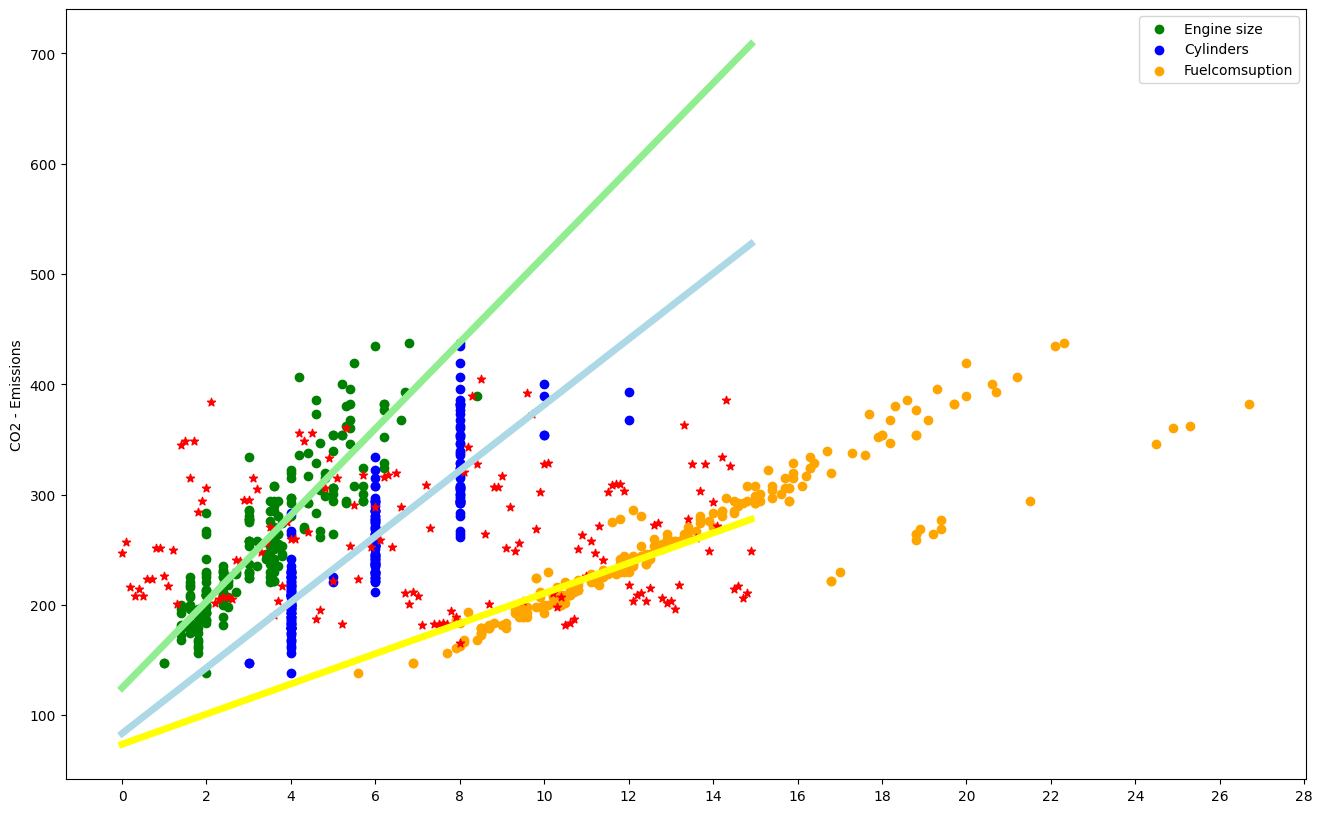

In [189]:
plt.figure(figsize=(16,10))
plt.ylabel("CO2 - Emissions")
plt.xticks(np.arange(0, 30, 2))
# plt.scatter(y_test, m, color='green', )
# plt.scatter(y_test, n, color='blue')
# plt.scatter(y_test, o, color='orange')
# plt.scatter(y_test, p, color='red')
plt.scatter(m, y_test, color='green')
plt.scatter(n, y_test, color='blue')
plt.scatter(o, y_test, color='orange')
# plt.scatter(p, y_test, color='red')

plt.legend(["Engine size", "Cylinders", "Fuelcomsuption"])

z = pd.DataFrame(np.arange(0, 15, 0.1))

plt.plot(z, m1.predict(z), color='lightgreen', linewidth=5)
plt.plot(z, m2.predict(z), color='lightblue', linewidth=5)
plt.plot(z, m3.predict(z), color='yellow', linewidth=5)

plt.scatter(z, multi_regression_model.predict([j for i, j in enumerate(X_test) if i < 150]), color='red', marker="*")
# plt.scatter(20, multi_regression_model.predict(np.array([8, 8, 24]).reshape(-1, 1)), color='red', marker="*")

plt.show()

In [159]:
[w[0] for q, w in enumerate(y_test) if q < 15]

[230, 255, 225, 214, 230, 214, 224, 224, 258, 258, 230, 242, 258, 212, 407]

In [167]:
[(i, j) for i, j in enumerate(X_test) if i < 1]

[(0, array([ 3.5,  6. , 11.9]))]

In [171]:
multi_regression_model.predict([j for i, j in enumerate(X_test) if i < 15])

array([[247.22549902],
       [257.05052742],
       [216.52206461],
       [208.51093361],
       [214.33039651],
       [208.51093361],
       [223.90995577],
       [223.90995577],
       [251.34456661],
       [251.34456661],
       [226.4040113 ],
       [216.82445204],
       [249.68186292],
       [201.02876702],
       [344.73946835]])